___

<!-- Author: https://www.kaggle.com/lasm1984 -->

This notebook analyzes store sales time series data to make predictions for a Kaggle competition [Alexis Cook, DanB, inversion, Ryan Holbrook. (2021). Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting). It loads and prepares the data, conducts exploratory analysis, trains Prophet forecasting models on sliced datasets and makes predictions.

Author: [Ale uy](https://www.kaggle.com/lasm1984) 

___

<h1 style="background-color:red;font-family:newtimeroman;color:black;font-size:380%;text-align:center;border-radius: 50px 50px;">Store Sales - Time Series Forecasting</h1>

<a id='goto0'></a>
<h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

0. [Table of Contents](#goto0)

1. [Notebook Description](#goto1)

2. [Loading Libraries](#goto2)

3. [Reading and Join Data Files](#goto3)

4. [Data Exploration](#goto4)

5. [Data Modeling](#goto5)

    5a. [Preprocessing](#goto5a)

    5b. [Prophet Model](#goto5b)

    5c. [Final Touches](#goto5c)

6. [Conclusions](#goto6)

<a id='goto1'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Notebook Description</h1>

[Back](#goto0)

## Description

### Goal of the Competition

In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

### Context

Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

### Potential Impact

If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.

**Author: [Ale uy](https://www.kaggle.com/lasm1984)**

<a id='goto2'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>

[Back](#goto0)

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 30)
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

import warnings; warnings.filterwarnings("ignore")

<a id='goto3'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Reading and Join Data Files</h1> 

[Back](#goto0)

### Import the main analysis datasets

We check the shape of the training and test dataframes.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)

The dimension of the train dataset is: (3000888, 6)
The dimension of the test dataset is: (28512, 5)


In [3]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
test.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


### Import other supporting datasets

In [7]:
holidays =  pd.read_csv('holidays_events.csv')
stores =  pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')

In [8]:
holidays.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [9]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [10]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [11]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


### Join the different datasets that have a common feature

In [12]:
# Add oil price
train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

# Add transactions
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')

# Add stores description
train = train.merge(stores, on='store_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

### Before adding holidays, apply transformations

In [13]:
# Delete transferred holidays
holidays = holidays.loc[holidays.iloc[:, -1] != "True"]

In [14]:
# Add holidays
train = train.merge(holidays, on='date', how='left')
test = test.merge(holidays, on='date', how='left')

<a id='goto4'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

[Back](#goto0)

### Adapt holiday depending on whether it is local, regional, national or not a holiday

We do some transformations on the holiday data to create columns indicating local, regional, and national holidays.

In [15]:
def nat_holiday(row):
    if row['locale'] == 'National':
        return 1
    else:
        return 0
def reg_holiday(row):
    if row['locale'] == 'Regional' and row['locale_name'] == row['state']:
        return 1
    else:
        return 0
def loc_holiday(row):
    if row['locale'] == 'Local' and row['locale_name'] == row['city']:
        return 1
    else:
        return 0

train['holiday_national'] = train.apply(nat_holiday, axis=1)
train['holiday_regional'] = train.apply(reg_holiday, axis=1)
train['holiday_local'] = train.apply(loc_holiday, axis=1)

test['holiday_national'] = test.apply(nat_holiday, axis=1)
test['holiday_regional'] = test.apply(reg_holiday, axis=1)
test['holiday_local'] = test.apply(loc_holiday, axis=1)

### Study the characteristics of the datasets

In [16]:
print(f'Number of observations: {test.shape[0]}\n Number of features: {train.shape[1]}')

Number of observations: 28512
 Number of features: 20


In [17]:
print(f'Time period covered by the data: {train.date.nunique()} days\n First day: {train.date[0]} || Last day: {train.date.iloc[-1]}')

Time period covered by the data: 1684 days
 First day: 2013-01-01 || Last day: 2017-08-15


In [18]:
print(f'Numbers of stores: {train.store_nbr.nunique()}')

Numbers of stores: 54


### Convert 'date' to pd.datetime

In [19]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

### Add day of the week

In [20]:
train['day_of_week'] = train['date'].dt.day_name()
test['day_of_week'] = test['date'].dt.day_name()

### Eliminate features that do not provide important data

* **locale, locale_name, description**: information within holidays
* **transferred**: not relevant
* **city, state**: information within clusters and type_x
* **transactions**: general information that does not separate into products


In [21]:
train = train.drop(columns=['city', 'state', 'transactions', 'type_y', 'locale', 'locale_name', 'description', 'transferred'])
test = test.drop(columns=['city', 'state', 'transactions', 'type_y', 'locale', 'locale_name', 'description', 'transferred'])

### Study behavior of the target series

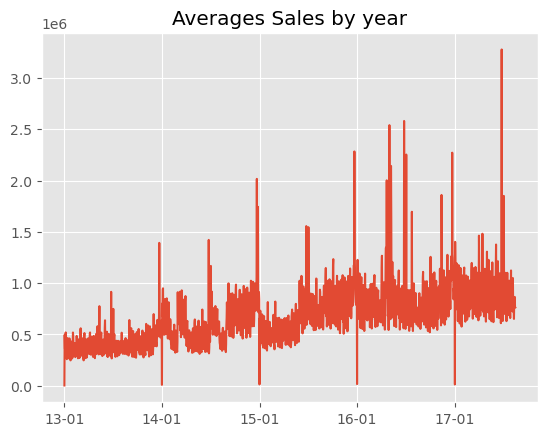

In [22]:
plt.plot(train.groupby('date')['sales'].sum())
plt.title('Averages Sales by year')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m'))
plt.show()

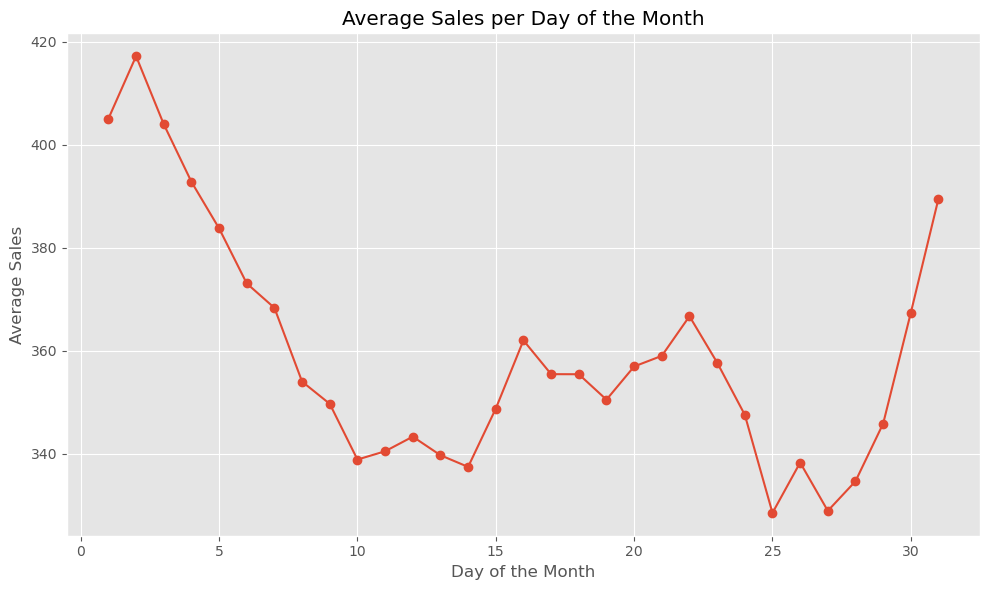

In [23]:
# Group the data by the day of the month and calculate the average sales for each day.
average_sales_per_day = train.groupby(train['date'].dt.day)['sales'].mean()

# Create a line or bar plot to represent the average sales per day of the month.
plt.figure(figsize=(10, 6))
plt.plot(average_sales_per_day.index, average_sales_per_day.values, marker='o', linestyle='-')
plt.xlabel('Day of the Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Day of the Month')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

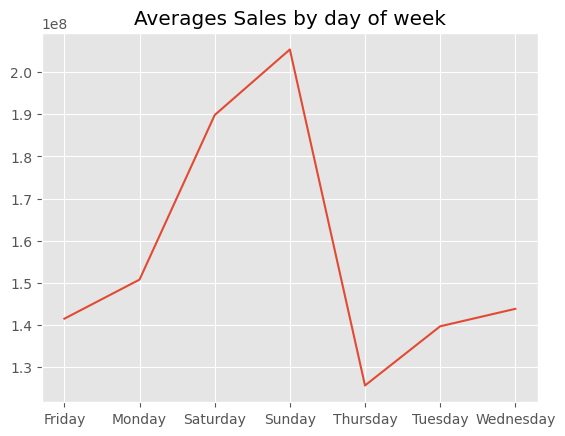

In [24]:
plt.plot(train.groupby('day_of_week')['sales'].sum())
plt.title('Averages Sales by day of week')
plt.show()

### First Conclusions:
* On the first day of the years there are many no sales
* The trend is increasing
* Half of each month and year sales increase a lot
* Saturdays and Sundays are when sales increase the most

*Much more data can be obtained by doing more preliminary analysis on the data, but our premise in this study is prediction.*

<a id='goto5'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Data Modeling</h1>

[Back](#goto0)

<a id='goto5a'></a>
# <h2 style="background-color:gold;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius: 50px 15px;">Preprocessing</h2>

[Back to models](#goto5)

### Clean NaN observations

In [25]:
print(train.isna().sum().sort_values(ascending=False) / train.shape[0] * 100)

dcoilwtico          31.271879
id                   0.000000
date                 0.000000
store_nbr            0.000000
family               0.000000
sales                0.000000
onpromotion          0.000000
type_x               0.000000
cluster              0.000000
holiday_national     0.000000
holiday_regional     0.000000
holiday_local        0.000000
day_of_week          0.000000
dtype: float64


In [26]:
# Use the next lowest value first and then the next highest value
train['dcoilwtico'] = train['dcoilwtico'].fillna(method='bfill')
train['dcoilwtico'] = train['dcoilwtico'].fillna(method='ffill')

In [27]:
train.dcoilwtico.isna().sum()

0

In [28]:
print(test.isna().sum().sort_values(ascending=False) / test.shape[0] * 100)

dcoilwtico          25.0
id                   0.0
date                 0.0
store_nbr            0.0
family               0.0
onpromotion          0.0
type_x               0.0
cluster              0.0
holiday_national     0.0
holiday_regional     0.0
holiday_local        0.0
day_of_week          0.0
dtype: float64


In [29]:
# Use the next lowest value first and then the next highest value
test['dcoilwtico'] = test['dcoilwtico'].fillna(method='bfill')
test['dcoilwtico'] = test['dcoilwtico'].fillna(method='ffill')

In [30]:
test.dcoilwtico.isna().sum()

0

### Create Dataset for each store and product

In [31]:
%%time

train_dict = {}

for store in train['store_nbr'].unique():
    for product in train['family'].unique():

        subset_df = train[(train['store_nbr'] == store) & (train['family'] == product)]

        key = f'train_{store}_{product}'.replace('/', '_').replace(' ', '_')

        train_dict[key] = subset_df

test_dict = {}

for store in test['store_nbr'].unique():
    for product in test['family'].unique():

        subset_df = test[(test['store_nbr'] == store) & (test['family'] == product)]

        key = f'test_{store}_{product}'.replace('/', '_').replace(' ', '_')

        test_dict[key] = subset_df

CPU times: total: 4min 21s
Wall time: 4min 36s


In [32]:
## Save Dataframe splits in small sets
# import os


# if not os.path.exists('keys'):
#     os.makedirs('keys')

# for key in train_dict.keys():
#     train_dict[key].to_csv(f'keys/{key}.csv', index=False)
# for key in test_dict.keys():
#     test_dict[key].to_csv(f'keys/{key}.csv', index=False)

<a id='goto5b'></a>
# <h2 style="background-color:gold;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius: 50px 15px;">Prophet Model</h2>

[Back to models](#goto5)

### Use prophet to train the temporal model and make prediction

In [33]:
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

### Prophet model

In [34]:
def train_prophet_model(
            df: pd.DataFrame, 
            target: str, 
            dates: str, 
            ):
        """
        Train and fit a Prophet model for time series forecasting.

        Parameters:
            df (pd.DataFrame): The DataFrame containing the time series data.
            target (str): The name of the column containing the target values.
            dates (str): The name of the column containing the corresponding dates.

        Returns:
            Prophet: The fitted Prophet model.
        """
        
        # Prepare the data in the format required by Prophet
        df_prophet = df.rename(columns={target: 'y', dates: 'ds'})

        best_model = Prophet(changepoint_prior_scale = 3.2).fit(df_prophet)

        return best_model

### Train splits little models.

In [35]:
%%time

for key in train_dict.keys():
    train_dict[key] = pd.get_dummies(train_dict[key], drop_first=True)
    model = train_prophet_model(train_dict[key], 'sales', 'date')
    with open(f'models/{key}.json', 'w') as fout:
        fout.write(model_to_json(model))

00:59:09 - cmdstanpy - INFO - Chain [1] start processing
00:59:09 - cmdstanpy - INFO - Chain [1] done processing
00:59:10 - cmdstanpy - INFO - Chain [1] start processing
00:59:10 - cmdstanpy - INFO - Chain [1] done processing
00:59:10 - cmdstanpy - INFO - Chain [1] start processing
00:59:11 - cmdstanpy - INFO - Chain [1] done processing
00:59:11 - cmdstanpy - INFO - Chain [1] start processing
00:59:12 - cmdstanpy - INFO - Chain [1] done processing
00:59:12 - cmdstanpy - INFO - Chain [1] start processing
00:59:12 - cmdstanpy - INFO - Chain [1] done processing
00:59:12 - cmdstanpy - INFO - Chain [1] start processing
00:59:13 - cmdstanpy - INFO - Chain [1] done processing
00:59:13 - cmdstanpy - INFO - Chain [1] start processing
00:59:13 - cmdstanpy - INFO - Chain [1] done processing
00:59:13 - cmdstanpy - INFO - Chain [1] start processing
00:59:14 - cmdstanpy - INFO - Chain [1] done processing
00:59:14 - cmdstanpy - INFO - Chain [1] start processing
00:59:14 - cmdstanpy - INFO - Chain [1]

CPU times: total: 3min 25s
Wall time: 23min 4s


### Predict models

In [36]:
%%time

ids = []
sales = []

for key in train_dict.keys():
    with open(f'models/{key}.json', 'r') as fin:
        model_json = fin.read()
        model = model_from_json(model_json)
    name = f'test{key[5:]}'
    test_dict[name] = pd.get_dummies(test_dict[name], drop_first=True)
    test_dict[name].rename(columns = {'date': 'ds'}, inplace=True)
    t = test_dict[name].drop(columns=['id'])
    predict = model.predict(t)
    ids.extend(test_dict[name]['id'])
    sales.extend(predict['yhat'])

CPU times: total: 2min 22s
Wall time: 5min


<a id='goto5c'></a>
# <h2 style="background-color:gold;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius: 50px 15px;">Final Touches</h2>

[Back to models](#goto5)

### Create final Dataframe

In [37]:
submission = pd.DataFrame()
submission['id'] = ids
submission['sales'] = sales

In [38]:
submission.head()

,id,sales
0,3000888,4.436991
1,3002670,3.969976
2,3004452,4.661190
3,3006234,4.531703
4,3008016,2.282255


### Convert to csv

In [39]:
submission.to_csv('output10.csv', index=False)

<a id='goto6'></a>
# <h1 style="background-color:orange;font-family:newtimeroman;color:black;font-size:300%;text-align:center;border-radius: 15px 50px;">Conclusions</h1>

[Back](#goto0)

### Submissions Scores

**output8.csv:** (changepoint_prior_scale = 3)
* Score (rmsle): 0.46566

**output10.csv:** (changepoint_prior_scale = 3.5)
* Score (rmsle): 0.46567

**output10.csv:** (changepoint_prior_scale = 4)
* Score (rmsle): 0.46577

**output7.csv:** (changepoint_prior_scale = 5)
* Score (rmsle): 0.46633

**output9.csv:** (changepoint_prior_scale = 2)
* Score (rmsle): 0.46741

**output5.csv:** (changepoint_prior_scale = 1)
* Score (rmsle): 0.46778

**output5.csv:** (changepoint_prior_scale = 10)
* Score (rmsle): 0.47033

**output.csv:** (changepoint_prior_scale = 0.5, seasonality_prior_scale = 10)
* Score (rmsle): 0.47767

**output3.csv:** (changepoint_prior_scale = 0.5, seasonality_prior_scale = 1)
* Score (rmsle): 0.47767

**output4.csv:** (changepoint_prior_scale = 0.5, holidays_prior_scale = 0.01)
* Score (rmsle): 0.47767

**submission.csv:** (changepoint_prior_scale = 0.05 (default), seasonality_prior_scale = 10 (default))
* Score (rmsle): 0.51021

**output1.csv:** (changepoint_prior_scale = 0.1, seasonality_prior_scale = 1)
* Score (rmsle): 0.51506

**output2.csv:** (changepoint_prior_scale = 0.5, seasonality_prior_scale = 10, seasonality_mode = 'multiplicative')
* Score (rmsle): 0.64443